### <center> Homework Assignment 10</center>

Héctor Andrade Loarca # 375708 

Melf Boeckel # 543098

We want to implement  the Basis Pursuit problem for a sparse vector x:
$$
\min_{x\in \mathbb{R}^n} ||x||_1 \text{  s.t. } Ax=b
$$
as we dont have arbitrary precision in the computer we will take the constraint $||Ax-b||_2 < \epsilon$ for some small $\epsilon>0$.

In [265]:
# Some libraries to use
using Convex
import SCS.SCSSolver
using Gadfly
set_default_plot_size(20cm, 16cm)

In [266]:
# Define the size of the matrices and vectors and the tolerance
n=1024
m=400
ϵ=0.0001

0.0001

In [267]:
#Define the vectors
A = rand(m, n)
signal1 = rand(n)
#Delete randomly 5% of the 
signal2 = zeros(n)
# random indices
index=unique(rand(1:n,10*n))[1:int(0.05*n)]
for i in index
    signal2[i]=signal1[i]
end

First lets do BP to recover the original dense signal:

In [277]:
solver = SCSSolver(verbose=0);
x1 = Variable(n)
problem = minimize(norm(x1,1), norm(A*(x1-signal1))<=ϵ)
solve!(problem, solver)

First lets do BP to recover the sparse signal:

In [278]:
solver = SCSSolver(verbose=0);
x2 = Variable(n)
problem = minimize(norm(x2,1), norm(A*(x2-signal2))<=ϵ)
solve!(problem, solver)

Now, lets plot everything

In [279]:
# Functin to trim zeros just for plot porpuses
function addzeros(x)
    newsignal=zeros(2*length(x))
    for i in 1:2*n
        if i%2==0
            newsignal[i]=x[int(i/2)]
        else
            newsignal[i]=0
        end
    end
    newsignal
end

addzeros (generic function with 1 method)

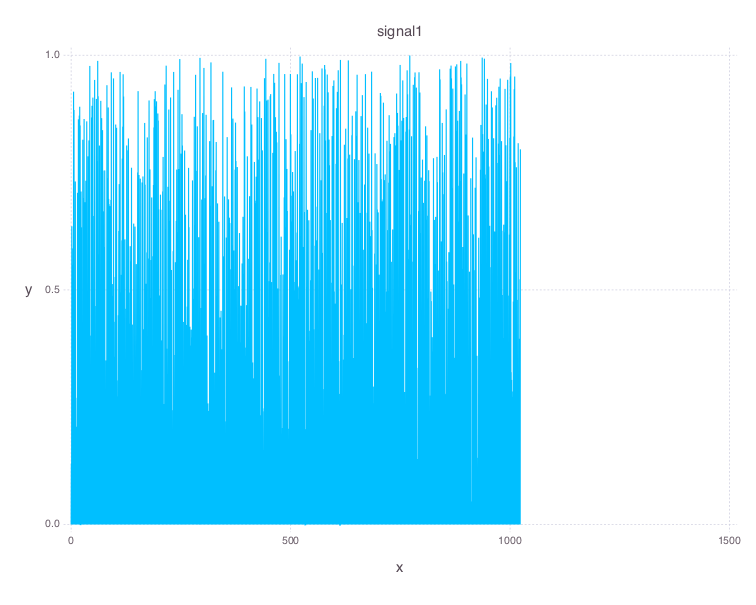

In [280]:
plot(x=[0:0.5:(n-0.5)], y=addzeros(signal1), 
Geom.line, Guide.title("signal1"))

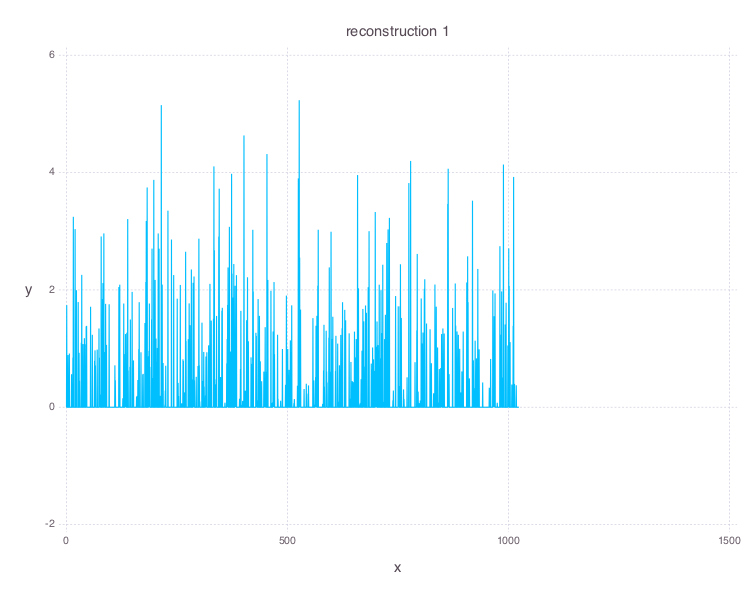

In [281]:
plot(x=[0:0.5:(n-0.5)], y=addzeros(x1.value), 
Geom.line, Guide.title("reconstruction 1"))

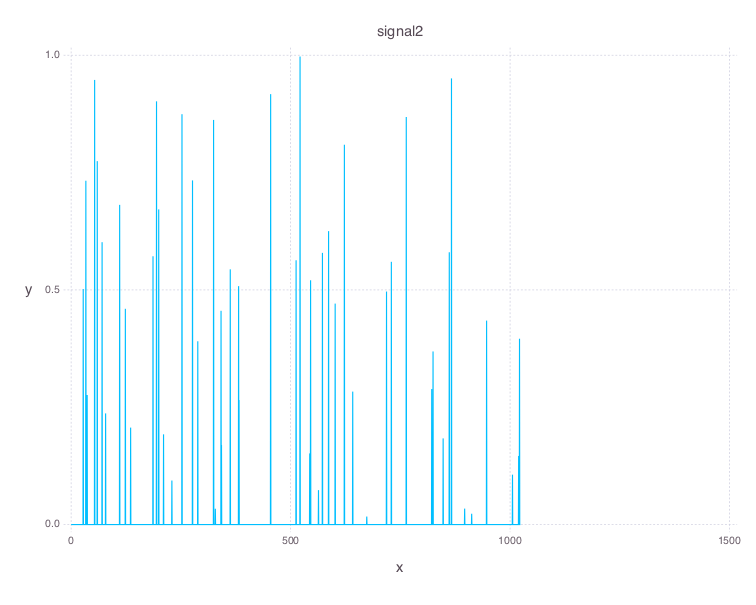

In [282]:
plot(x=[0:0.5:(n-0.5)], y=addzeros(signal2), 
Geom.line, Guide.title("signal2"))

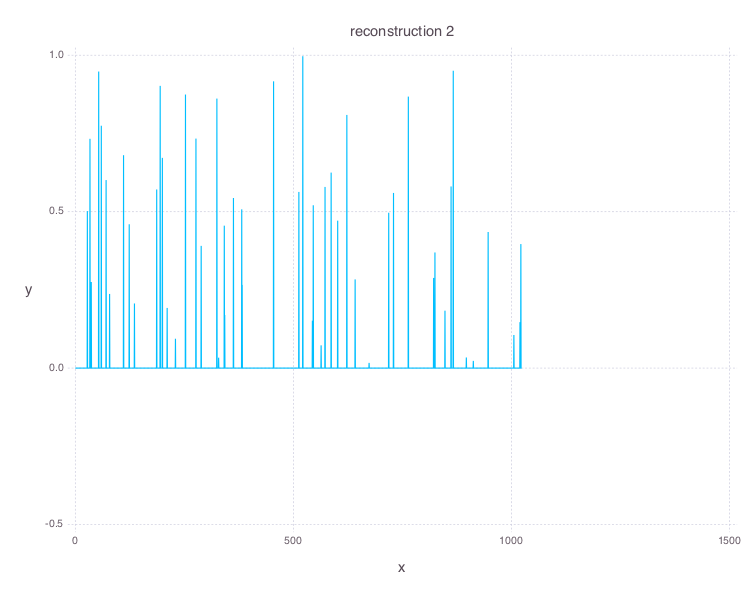

In [286]:
plot(x=[0:0.5:n-0.5], y=addzeros(x2.value), 
Geom.line, Guide.title("reconstruction 2"))

We can see that the reconstruction for the dense original signal es very bad, but the reconstruction for the sparse signal is very good, that is because BP has unique optimal solution for sparse vectors, since you are trying to minimize the norm1 that minimizes in some sense the support of the signal, the relative errors are showed in the following:

In [287]:
#Relative error for the dense signal reconstruction
println("Error for dense signal reconstruction = ", norm(signal1-x1.value)/norm(signal1) );

Error for dense signal reconstruction = 1.5147875126664998


In [288]:
#Relative error for the sparse signal
println("Error for dense signal reconstruction = ", norm(signal2-x2.value)/norm(signal2) );

Error for dense signal reconstruction = 0.0007248863974032467
